## PCA

In [1]:
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

In [3]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

plt.style.use('fivethirtyeight')

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 10
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 10
plt.rcParams['figure.titlesize'] = 12
plt.rcParams['image.cmap'] = 'jet'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (16, 8)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8

colors = ['#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', '#810f7c', 
'#137e6d', '#be0119', '#3b638c', '#af6f09', '#008fd5', '#fc4f30', '#e5ae38', '#6d904f', '#8b8b8b', 
'#810f7c', '#137e6d', '#be0119', '#3b638c', '#af6f09']

cmap = mcolors.LinearSegmentedColormap.from_list("", ["#82cafc", "#069af3", "#0485d1", colors[0], colors[8]])

In [4]:
mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T

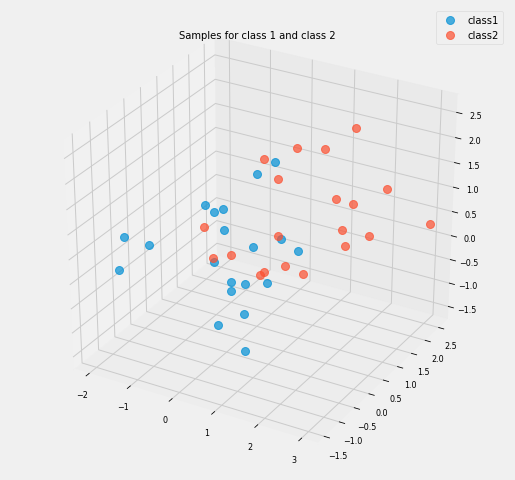

In [5]:

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color=colors[0], alpha=0.7, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], 'o', markersize=8, alpha=0.7, color=colors[1], label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [41]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
all_samples.shape

(3, 40)

In [42]:
mean_x = np.mean(all_samples[0,:])
mean_y = np.mean(all_samples[1,:])
mean_z = np.mean(all_samples[2,:])

mv = np.array([[mean_x],[mean_y],[mean_z]])

print('Mean Vector:')
print(mv)

Mean Vector:
[[0.57673756]
 [0.51143613]
 [0.52852496]]


In [44]:
S = np.dot((all_samples-mv),(all_samples-mv).T)
print('Scatter Matrix:')
print(S)

Scatter Matrix:
[[49.94253446 18.64278972  9.61169589]
 [18.64278972 38.21348698  5.31826352]
 [ 9.61169589  5.31826352 31.73456649]]


In [45]:
cov_mat = np.cov(all_samples)
print('Covariance Matrix:')
print(cov_mat)

Covariance Matrix:
[[1.28057781 0.47802025 0.24645374]
 [0.47802025 0.979833   0.13636573]
 [0.24645374 0.13636573 0.81370683]]


In [46]:
# eigenvectors and eigenvalues from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(S)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_sc)):
    eigvec_sc = eig_vec_sc[:,i].reshape(1,3).T
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T

    print('Autovettore {0:d}: {1:s}'.format(i+1, str(eigvec_sc.T)))
    print('Autovalore {0:d} da scatter matrix: {1:12f}'.format(i+1, eig_val_sc[i]))
    print('Autovalore {0:d} da covariance matrix: {1:.12f}'.format(i+1, eig_val_cov[i]))
    print('Rapporto: {0:.12f}'.format(eig_val_sc[i]/eig_val_cov[i]))
    print(40 * '-')

Autovettore 1: [[0.77594182 0.55726481 0.29558453]]
Autovalore 1 da scatter matrix:    66.992833
Autovalore 1 da covariance matrix: 1.717764936483
Rapporto: 39.000000000000
----------------------------------------
Autovettore 2: [[ 0.62861687 -0.72209552 -0.28882328]]
Autovalore 2 da scatter matrix:    24.111289
Autovalore 2 da covariance matrix: 0.618238186502
Rapporto: 39.000000000000
----------------------------------------
Autovettore 3: [[-0.05248922 -0.40991948  0.91061018]]
Autovalore 3 da scatter matrix:    28.786466
Autovalore 3 da covariance matrix: 0.738114516321
Rapporto: 39.000000000000
----------------------------------------


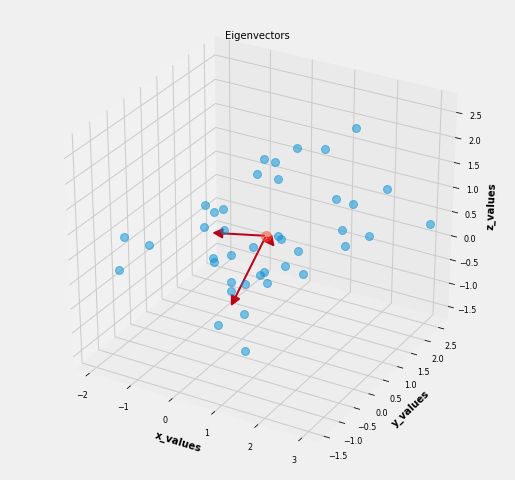

In [47]:
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.plot(all_samples[0,:], all_samples[1,:], all_samples[2,:], 'o', markersize=8, color=colors[0], alpha=0.5)
ax.plot([mean_x], [mean_y], [mean_z], 'o', markersize=10, color=colors[1], alpha=0.5)
for v in eig_vec_sc.T:
    a = Arrow3D([mean_x, v[0]], [mean_y, v[1]], [mean_z, v[2]], mutation_scale=20, lw=2, arrowstyle="-|>", color=colors[7])
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()

In [48]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0], i[1])

66.99283252284457 [0.77594182 0.55726481 0.29558453]
28.786466136535733 [-0.05248922 -0.40991948  0.91061018]
24.111289273592593 [ 0.62861687 -0.72209552 -0.28882328]


In [49]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:')
print(matrix_w)

Matrix W:
[[ 0.77594182 -0.05248922]
 [ 0.55726481 -0.40991948]
 [ 0.29558453  0.91061018]]


In [50]:
Xp = matrix_w.T.dot(all_samples-mv)

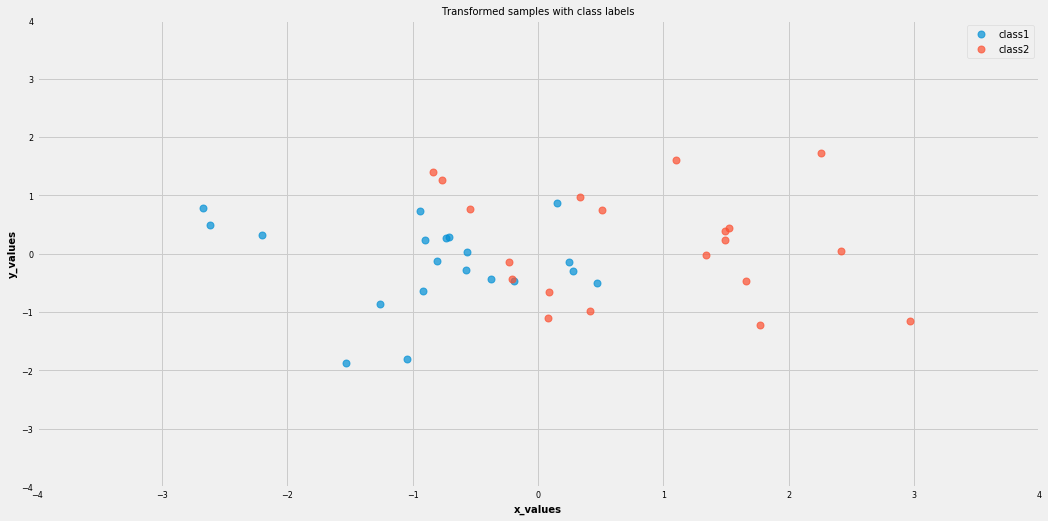

In [51]:
fig = plt.figure(figsize=(16,8))
plt.plot(Xp[0,0:20], Xp[1,0:20], 'o', markersize=7, color=colors[0], alpha=0.7, label='class1')
plt.plot(Xp[0,20:40], Xp[1,20:40], 'o', markersize=7, color=colors[1], alpha=0.7, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

In [54]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=1)
sklearn_transf = -sklearn_pca.fit_transform((all_samples-mv).T)

sklearn_transf

array([[ 0.94172202],
       [ 2.67562099],
       [-0.1501998 ],
       [ 1.5292382 ],
       [ 0.90000967],
       [-0.24849953],
       [ 2.61451903],
       [-0.46785055],
       [ 0.73309921],
       [ 0.37500192],
       [ 0.70928618],
       [ 0.80752004],
       [ 1.26221735],
       [ 0.57068755],
       [ 1.04691962],
       [ 2.1996413 ],
       [-0.28324634],
       [ 0.91403826],
       [ 0.1876181 ],
       [ 0.56950309],
       [-2.41995211],
       [-0.33549914],
       [-1.52725925],
       [-1.34127381],
       [-1.77004229],
       [ 0.76332319],
       [-0.09146025],
       [-1.48969729],
       [-0.08174008],
       [-1.65696325],
       [-0.41714949],
       [-0.51372844],
       [-2.2595477 ],
       [-2.97263667],
       [-1.49184444],
       [-1.09791858],
       [ 0.53969373],
       [ 0.83876358],
       [ 0.20993836],
       [ 0.22814762]])

In [ ]:
fig = plt.figure(figsize=(16,8))
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color=colors[0], alpha=0.7, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], 'o', markersize=7, color=colors[1], alpha=0.7, label='class2')

plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()